## **SVM Titanic**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df = pd.read_csv(url)
df.head(3)
# Import data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* survival:	Survival	0 = No, 1 = Yes
* pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex:	Sex	
* Age:	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:	# of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare:	Passenger fare	
* cabin:	Cabin number	
* embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## **EDA**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
# We drop Cabin No because it's ineffective 
df.drop("Cabin", axis=1, inplace= True)

In [82]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


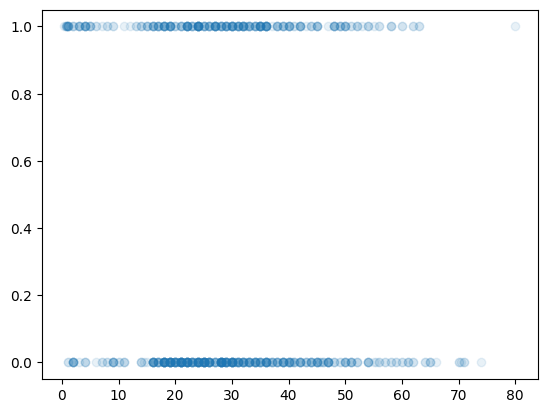

In [83]:
plt.scatter(x = "Age", y = "Survived", data=df, alpha= 0.1)

In [84]:
# Survived Rate
survived = len(df[df["Survived"] == 1])
allPassengers = len(df)

survivedRate = round((survived / allPassengers), 2)
survivedRate

0.38

In [85]:
# Survival rate of child passengers

survivedChilds = len(df[(df["Survived"] == 1) & (df["Age"] < 18)])
allChilds = len(df[df["Age"] < 18])

childsSurvivedRate = round((survivedChilds / allChilds), 2)
print(childsSurvivedRate)

0.54


In [86]:
df.isna().sum()
# Burada 177 adet yaşı bilinmeyen yolcumuz var bunları ya dolduracağız ya da atacağız

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [87]:
ageNaN = df[df["Age"].isna()]
len(ageNaN)

177

In [88]:
ageNaN.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [ ]:
ageNaN["Pclass"].value_counts()
# 136 tane yolcu 3. sınıfta 3. sınıf önce 3 sınıf yolcuların yaş ortalaması alınarak ve eklenerek bir model oluşturalım 

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [90]:
# Yaşı belirli olmayanların çoğunluğu 3. sınıfa mensup olduğundan 3. sınıfın yaş ortalamasıyla verilerimizi doldurduk 
thirClassMember = df[(df["Pclass"] == 3)]
thirdClassAgeMean = thirClassMember["Age"].mean()
thirClassMember["Age"].mean()

df["Age"].fillna(thirdClassAgeMean, inplace= True)

df["Age"].isna().sum()

C:\Users\himme\AppData\Local\Temp\ipykernel_26252\2305506136.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(thirdClassAgeMean, inplace= True)


0

In [91]:
# Kalan NaN verilerimizi dropladık
df.dropna(inplace= True)

In [92]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Age', ylabel='Pclass'>

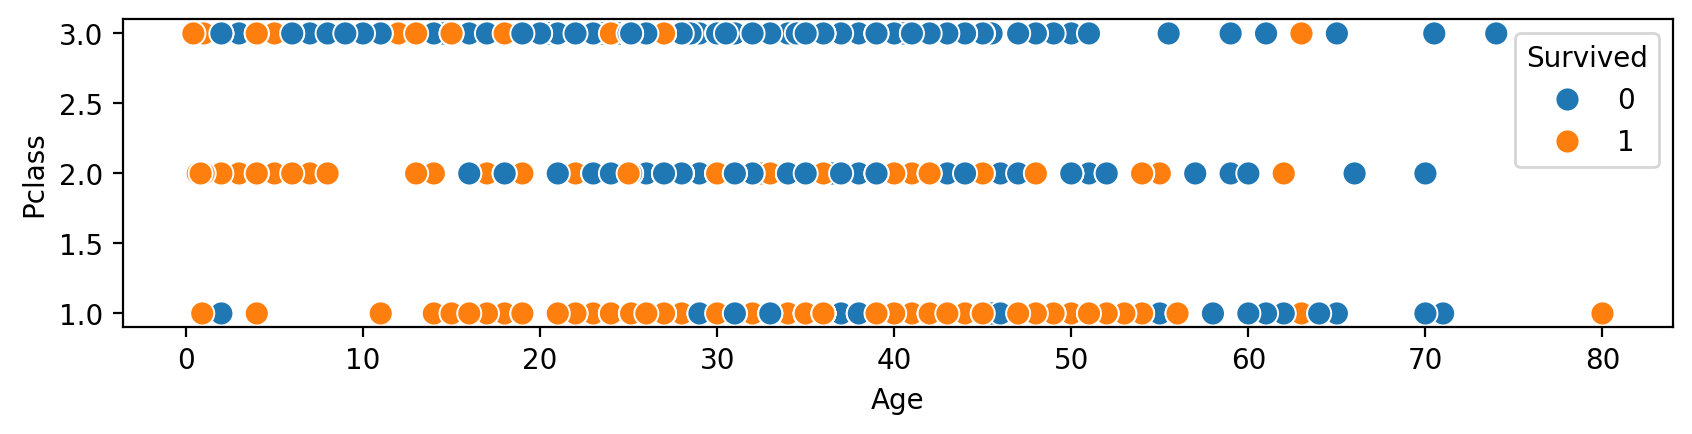

In [93]:
plt.figure(figsize=(10, 2), dpi=200)

sns.scatterplot(x = "Age", y = "Pclass",data=df, hue="Survived", s= 75)

# Garibanın yüzü gülürmü ? 

In [94]:
df[["Pclass", "Survived"]].value_counts()

Pclass  Survived
3       0           372
1       1           134
3       1           119
2       0            97
        1            87
1       0            80
Name: count, dtype: int64

In [95]:
# Garibanların ve kodomanların hayatta kalma oranları

# Garibanlar

garibanSurvived = len(df[(df["Pclass"] == 3) & (df["Survived"] == 1)])
allgaribans = len(df[df["Pclass"] == 3])

garibansRate = round(garibanSurvived / allgaribans, 2)
garibansRate

0.24

In [96]:
# Kodomanlar

kodomanSurvived = len(df[(df["Pclass"] == 1) & df["Survived"] == 1])
allKodomans = len(df[df["Pclass"] == 1])

kodomansRate = round(kodomanSurvived / allKodomans, 2)
kodomansRate

0.63

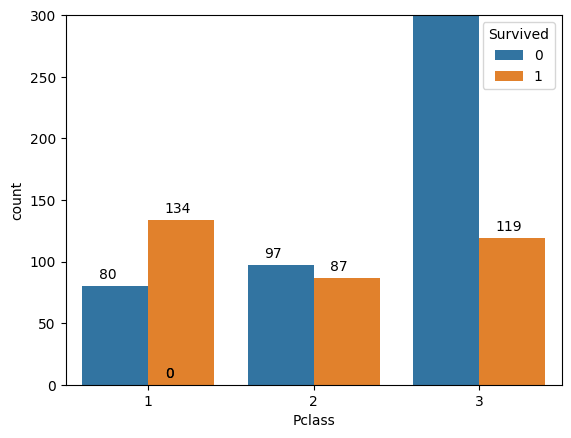

In [97]:
ax = sns.countplot(x="Pclass", data=df, hue="Survived")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
plt.ylim(0,300);

## Train test Split

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [99]:
df.drop(["Name", "PassengerId", "Ticket"], axis= 1, inplace= True)

In [100]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [101]:
df = pd.get_dummies(df, drop_first= True)

In [102]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False


In [103]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [105]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False


In [106]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

In [ ]:
len(df) # Yaklaşık 900 verimiz var test_size = 0.2 kullanacağım

889

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9)

## SVM Model

In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [117]:
# Parametreler

C = C = 10.0 ** np.arange(-2, 4)

parameters = {
    "kernel" : ["rbf", "poly"],
    "degree" : [2, 3, 4],
    "C" : C
    }

In [120]:
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [118]:
svmModel = SVC()

In [119]:
grid_model = GridSearchCV(svmModel, param_grid=parameters, cv=9)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'poly']})

In [121]:
grid_model.best_params_

{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}

In [122]:
gridPred = grid_model.predict(X_test)

## Metrics

In [123]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

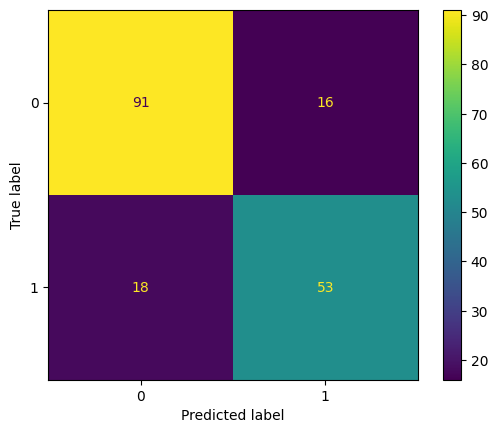

In [124]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test ,y_test)

In [125]:
print(classification_report(gridPred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.75      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

